<a href="https://colab.research.google.com/github/naveenrc/ml-lab/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.1225 - accuracy: 0.6812
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6511 - accuracy: 0.7808
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5812 - accuracy: 0.8044
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5363 - accuracy: 0.8164
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5063 - accuracy: 0.8271
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5006 - accuracy: 0.8272
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4879 - accuracy: 0.8317
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4815 - accuracy: 0.8325
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8365
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.469

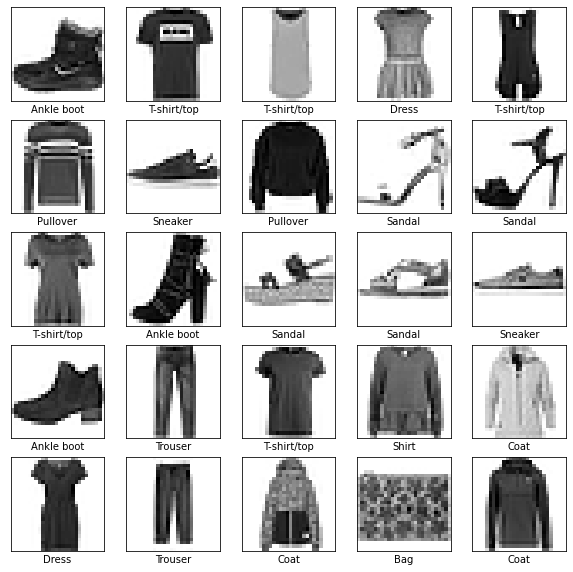

In [38]:
!pip install ipympl

%matplotlib inline
import ipywidgets as widgets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Print a few images**

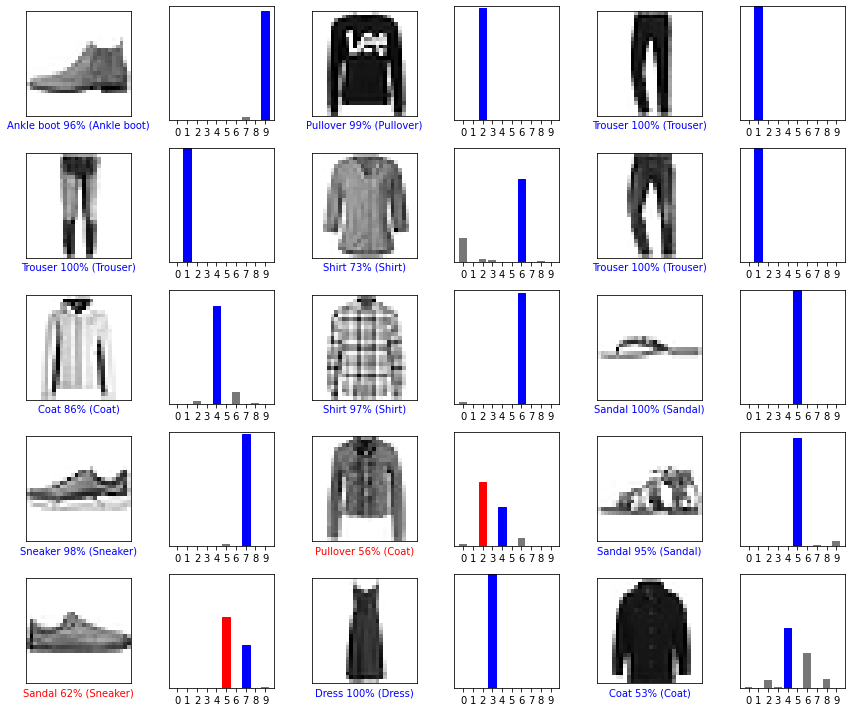

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Interactive image predictions**

In [41]:
plt.figure(figsize=(6,3))
def plot_interactive(i):
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
 
_ = widgets.interact(plot_interactive, i=(0, 100, 1))

<Figure size 432x216 with 0 Axes>

interactive(children=(IntSlider(value=50, description='i'), Output()), _dom_classes=('widget-interact',))